# Analysis Notebook

## Input parameters
- `dataset` - The name of the dataset to load. Use "strava-activities" or "strava-activities-subset"

In [56]:
dataset = 'strava-activities-subset'

## Analysis

Import libaries

In [57]:
from pyspark.sql.functions import round, sum
import pandas as pd

%matplotlib inline
from matplotlib import pyplot as plt
from IPython.core.pylabtools import figsize

Load dataset

In [58]:
df = sqlContext.read.parquet('s3n://larsbk/parquet/%s/' % dataset)
dfa = sqlContext.read.parquet('s3n://larsbk/parquet/agg/%s/' % dataset)

sqlContext.registerDataFrameAsTable(df, 'point')
sqlContext.registerDataFrameAsTable(dfa, 'block')

Let's do this!
### Speed histogram

In [59]:
pdf = df.filter("activity_type='Ride'") \
        .groupBy(round('p_speed_kmh').alias('speed_int')) \
        .sum('p_diff_time_seconds') \
        .toPandas()

In [60]:
pdf = sqlContext.sql(
"""
  SELECT 
    round(p_speed_kmh) AS speed_int,
    sum(p_diff_time_seconds) AS seconds_with_speed
  FROM
    point
  WHERE
    activity_type = 'Ride'
  GROUP BY
    round(p_speed_kmh)
"""
).toPandas()

<Container object of 81 artists>

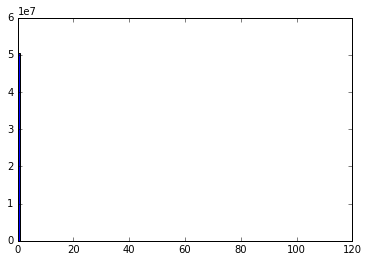

In [61]:
plt.bar(pdf['speed_int'], pdf['seconds_with_speed'])